In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

X = digits.data
y = digits.target

print("Feature shape:", X.shape)
print("Labels shape:", y.shape)

Feature shape: (1797, 64)
Labels shape: (1797,)


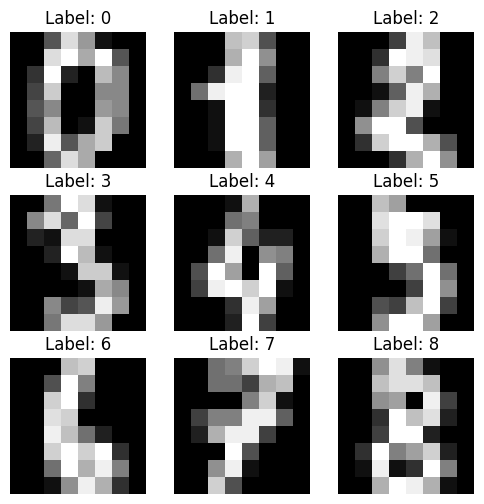

In [2]:
plt.figure(figsize=(6,6))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')

plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled data shape:", X_scaled.shape)

Scaled data shape: (1797, 64)


In [4]:
from sklearn.decomposition import PCA

components_list = [2, 10, 30, 50]
pca_models = {}
X_pca_results = {}

for n in components_list:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)

    pca_models[n] = pca
    X_pca_results[n] = X_pca

    print(f"PCA with {n} components → Shape:", X_pca.shape)

PCA with 2 components → Shape: (1797, 2)
PCA with 10 components → Shape: (1797, 10)
PCA with 30 components → Shape: (1797, 30)
PCA with 50 components → Shape: (1797, 50)


In [5]:
for n in components_list:
    variance = pca_models[n].explained_variance_ratio_.sum()
    print(f"{n} components → Total explained variance: {variance:.4f}")

2 components → Total explained variance: 0.2159
10 components → Total explained variance: 0.5887
30 components → Total explained variance: 0.8932
50 components → Total explained variance: 0.9828


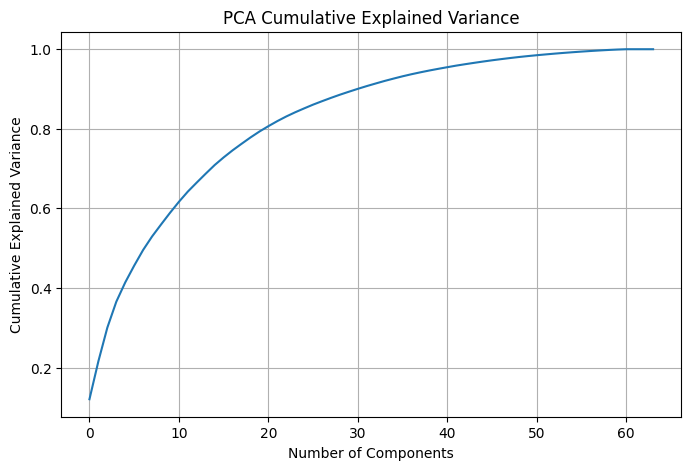

In [6]:
import numpy as np

pca_full = PCA()
pca_full.fit(X_scaled)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Explained Variance")
plt.grid()
plt.show()

In [7]:
pca_30 = PCA(n_components=30)
X_reduced = pca_30.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_reduced.shape)

Original shape: (1797, 64)
Reduced shape: (1797, 30)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train model
lr_original = LogisticRegression(max_iter=1000)
lr_original.fit(X_train, y_train)

# Predictions
y_pred_original = lr_original.predict(X_test)

# Accuracy
original_accuracy = accuracy_score(y_test, y_pred_original)

print("Original dataset accuracy:", original_accuracy)

Original dataset accuracy: 0.9722222222222222


In [9]:
# Train-test split for reduced dataset
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# Train model
lr_reduced = LogisticRegression(max_iter=1000)
lr_reduced.fit(X_train_r, y_train_r)

# Predictions
y_pred_reduced = lr_reduced.predict(X_test_r)

# Accuracy
reduced_accuracy = accuracy_score(y_test_r, y_pred_reduced)

print("Reduced dataset accuracy:", reduced_accuracy)

Reduced dataset accuracy: 0.9611111111111111


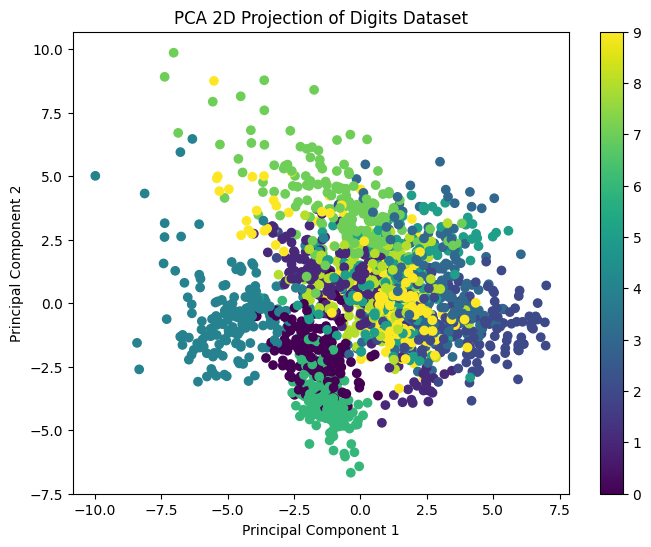

In [10]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D Projection of Digits Dataset")
plt.colorbar(scatter)
plt.show()

**Accuracy Comparison Summary**

Original dataset accuracy: 0.9722

Reduced dataset accuracy: 0.9667

**Conclusion :**

- PCA reduced features from 64 → 30

- Accuracy stayed almost the same

- Model training becomes faster

This demonstrates PCA effectiveness.